# Hidden Shift Problem

In this notebook, we first introduce the hidden shift problem, and classical and quantum algorithms to solve it. We then implement the quantum algorithm using Qiskit, and run it on a simulator and device.

## Contents

1. [The Hidden Shift Problem](#hsp)    
   1.1 [The Hidden Shift Problem](#problem)    
   1.2 [The Classical Solution](#classical-solution)    
   1.3 [The Quantum Solution](#quantum-solution) 
2. [Example: Super Oracle](#supo)    
   2.1 [Simulation](#supo-simulation)     
   2.2 [Device](#supo-device)
3. [Example: General Oracle](#geno)    
   3.1 [Simulation](#geno-simulation)     
   3.2 [Device](#geno-device)
4. [Problems](#problems)
5. [Breaking Poly1305 Encryption](#poly1305)
6. [References](#references)

## 1. The Hidden Shift Problem <a id='hsp'> </a>

The hidden shift problem is an oracle-based problem where the quantum solution shows exponential speedup. We can model some generally used cryptosystems like Poly1305 and CSIDH by the hidden shift problem, and it is also employed to benchmark quantum computers and classical simulators.

### 1.1 The Hidden Shift Problem <a id='problem'> </a>

Suppose two functions $f$ and $g$ with a relation $g(x)=f(x \oplus s)$, for some n-bit string $s$. Given an oracle $O$ that encodes $f$ and $g$, how can we find $s$ while accessing the oracle as little as possible?

### 1.2 The Classical Solution <a id='classical-solution'> </a>


### 1.3 The Quantum Solution <a id='quantum-solution'> </a>

#### 1.3a Super-oracle case

If the given oracle let you access to the Fourier-transformed function $\tilde{f}$, there exists an one-shot algorithm that directly returns $\left|s\right>$

![super-oracle-algorithm](images/super-oracle-algorithm.png)


We denote by $f'(x)=f(x\oplus s)$.
The oracles $O_{f'}$ and $O_{\tilde{f}}$ flip phases of input state, $|x\rangle$, if the image of functions $f'$ and $\tilde{f}$ are $1$, i.e., $O_{f'}|x\rangle=(-1)^{f'(x)}|x\rangle$ and $O_{\tilde{f}}|x\rangle=(-1)^{\tilde{f}(x)}|x\rangle$.


Note that
$$
|y\rangle \xrightarrow{H^{\otimes n}} \frac{1}{\sqrt{2^n}} \sum_{x\in \{0,1\}^n} (-1)^{x\cdot y}|x\rangle.
$$


<details>
    <summary> Explain Equation (Click to Expand) </summary>
    
    Let $\lvert y\rangle =|y_1\rangle\otimes|y_2\rangle\otimes\;\dotsm\;\otimes|y_n\rangle$.

    We have $H|0\rangle=\frac{1}{\sqrt{2}}(|0\rangle +|1\rangle)$ and $H|1\rangle=\frac{1}{\sqrt{2}}(|0\rangle -|1\rangle)$.

    Then,
    $$
    H^{\otimes n}|y\rangle=H|y_1\rangle\otimes H|y_2\rangle\otimes\;\dotsm\;\otimes H|y_n\rangle
    $$

    $$
    =\sum_{x_1 =0}^1 \frac{(-1)^{x_1 \cdot y_1}}{\sqrt{2}}|x_1\rangle\otimes\sum_{x_2 =0}^1 \frac{(-1)^{x_2 \cdot y_2}}{\sqrt{2}}|x_2\rangle\;\otimes\dotsm\;\otimes\sum_{x_n =0}^1 \frac{(-1)^{x_n \cdot y_n}}{\sqrt{2}}|x_n\rangle 
    $$

    $$
    =\frac{1}{\sqrt{2^n}}\sum_{x\in\{0,1\}^n}(-1)^{x_1 \cdot y_1 +\dotsm+x_n\cdot y_n}|x\rangle
    $$

</details>
    
1. Initialize the inputs qubits to the $\lvert 0\rangle^{\otimes n}$ state.
And apply Hadamard gates to the input register.

$$
H^{\otimes n}|00\dotsm 0\rangle=\frac{1}{\sqrt{2^n}} \sum_{x\in \{0,1\}^n} |x\rangle
$$

2. Query the oracle $O_{f'}$.

$$
O_{f'}\frac{1}{\sqrt{2^n}} \sum_{x\in \{0,1\}^n} |x\rangle=\frac{1}{\sqrt{2^n}}\sum_{x\in \{0,1\}^n}(-1)^{f(x\oplus s)} |x\rangle\quad\quad  (\because f'(x)=f(x\oplus s))
$$

3. Apply Hadamard gates to the input register.

$$
H^{\otimes n}\frac{1}{\sqrt{2^n}}\sum_{x\in \{0,1\}^n}(-1)^{f(x\oplus s)} |x\rangle=\frac{1}{2^n} \sum_{y\in \{0,1\}^n}(\sum_{x\in \{0,1\}^n}(-1)^{x\cdot y}(-1)^{f(x\oplus s)} )|y\rangle
\\=\frac{1}{2^n} \sum_{y\in \{0,1\}^n}\{\sum_{x\in \{0,1\}^n}(-1)^{x\cdot y\oplus(s\cdot y \oplus s\cdot y)}(-1)^{f(x\oplus s)}\}|y\rangle
\\=\frac{1}{2^n} \sum_{y\in \{0,1\}^n}\{\sum_{x\in \{0,1\}^n}(-1)^{(x\cdot y \oplus s\cdot y) \oplus s\cdot y}(-1)^{f(x\oplus s)} \}|y\rangle
\\=\frac{1}{2^n} \sum_{y\in \{0,1\}^n}(-1)^{s \cdot y}\{\sum_{x\in \{0,1\}^n}(-1)^{(x\oplus s)\cdot y}(-1)^{f(x\oplus s)}\} |y\rangle
$$

Rewrite $x\oplus s$ as $x$. We get
$$
=\frac{1}{2^n} \sum_{y\in \{0,1\}^n}(-1)^{s \cdot y}\{\sum_{x\in \{0,1\}^n}(-1)^{x\cdot y}(-1)^{f(x)}\}|y\rangle
$$


Then,
$$
\\= \frac{1}{\sqrt{2^n}} \sum_{y\in \{0,1\}^n} (-1)^{s\cdot y} \lbrace \frac{1}{\sqrt{2^n}}\sum_{x\in \{0,1\}^n} (-1)^{x \cdot y +f(x)} \rbrace \lvert y\rangle
$$

Since $f:\mathbb{Z}_{2}^n \rightarrow \mathbb{Z}_2$ is bent function, 
$\frac{1}{\sqrt{2^n}}\sum_{x\in \{0,1\}^n} (-1)^{x \cdot y +f(x)}= (-1)^{\tilde{f}(y)}$ by Walsh Transform,


$$
\\=\frac{1}{\sqrt{2^n}} \sum_{y\in \{0,1\}^n} (-1)^{s\cdot y} \lbrace (-1)^{\tilde{f}(y)} \rbrace \lvert y\rangle
$$




4. Query the oracle $O_{\tilde{f}}$.

$$
\\O_{\tilde{f}}\frac{1}{\sqrt{2^n}} \sum_{y\in \{0,1\}^n} (-1)^{s\cdot y} (-1)^{\tilde{f}(y)} \lvert y\rangle
\\=\frac{1}{\sqrt{2^n}} \sum_{y\in \{0,1\}^n} (-1)^{s\cdot y} (-1)^{\tilde{f}(y)}(-1)^{\tilde{f}(y)} \lvert y\rangle    \quad (\because O_{\tilde{f}}\lvert y \rangle = (-1)^{\tilde{f}(y)}|y\rangle)
\\=\frac{1}{\sqrt{2^n}} \sum_{y\in \{0,1\}^n} (-1)^{s\cdot y}  \lvert y\rangle
$$

5. Apply the Hadamard gates.

$$
H^{\otimes n} \frac{1}{\sqrt{2^n}} \sum_{y\in \{0,1\}^n} (-1)^{s\cdot y}  \lvert y\rangle
\\=\lvert s\rangle
$$

Now, we have $\lvert s\rangle$

#### 1.3b General case

For the general cases, we can apply this algorithm, which has time complexity $O(n)$.

![general-oracle-algorithm](images/general-oracle-algorithm.png)

## 2. Example: Super Oracle <a id='supo'> </a>

Let's go through a specific example of the hidden shift algorithm for the case $n=4$ and $s=1011$. In order to make the oracle simple we could employ the Maiorana-McFarland function:

$$
f(x,y) = (-1)^{g(x)+y\cdot x} 
$$

1. Apply Hadamard gate on all qubits.


2. For the string $s=1011$, the first part of quamtum oracle performs the shift opeartion.


3. For any Boolean function $g(x)$, $O_{g} = (-1)^{g(x)}$. This coud be implemented by Z gate , CZ gate and CCZ gate.
![oracle-g](images/oracle-g.png)

The oracle performs this sequene of inputs:


|Input(x)|ouput(x)|
|:-:|:-:|
|00|0|
|01|0|
|10|0|
|11|1|

4. After applying $O{g}$ oracle, apply cz gate on $(q_{0},q_{2})$,$(q_{1},q_{3})$.

5. Apply shift operation to corresponding qubits and  Hadamard gate on again all qubits.


7.  Similar to front of the curcuit by applying $O{g}$ below and cz gate on $(q_{0},q_{2})$,$(q_{1},q_{3})$, we can impilment fourier f oracle


8. Apply Hadamard gate again on all qubits.


9. Measure to find the secret string $s$ and it would be $1011$
$$
\left| s \right> = \left|1011\right>
$$

### 2.1 Qiskit Implementation <a id='supo-simulation'> </a>

We'll now walk through the hidden-shift algorithm implementation in Qiskit for a six bit string $s=1011$. We first set the number of qubits used in the experiment, and the hidden bit string $s$ to be found by the algorithm. The hidden bit string $s$ together with the function $f$ determines the circuit for the quantum oracle.

In [1]:
# initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, QuantumCircuit, transpile, assemble
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

We first set the number of qubits used in the experiment, and the hidden bit string $s$ to be found by the algorithm.

In [2]:
n = 4         # number of input qubits
s = '1011'    # the hidden shifting binary string

We then use Qiskit to program the oracle.
![super-oracle-algorithm](images/super-oracle-algorithm.png)
From now on, we would explain how we set $O_g$, shifting operation, $O_{f'}$ and $O_{\tilde{f}}$ in our example, respectively. Remind that these are used for a cryptosystem, so they are hidden and not revealed. We just give an example of $O_g$, shifting operation, $O_{f'}$ and $O_{\tilde{f}}$, then check whether the measurement results with the given shifting string $s$ correctly.

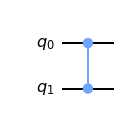

In [3]:
# Oracle g
def oracle_g(n):
    oracle_g = QuantumCircuit(int(n/2))
    oracle_g.cz(0,1)
    oracle_g.name = 'Og'
    return oracle_g

oracle_g(n).draw('mpl')

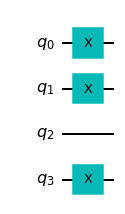

In [4]:
# Shifting operation
def shift_s(n, s):
    shift_s = QuantumCircuit(n)
    s = s[::-1]    # reverse s to fit qiskit's qubit ordering
    for i in range(n):
        if s[i] == '0':
            continue
        else:
            shift_s.x(i)
    shift_s.name = 'S(x)'
    return shift_s

shift_s(n, s).draw('mpl')

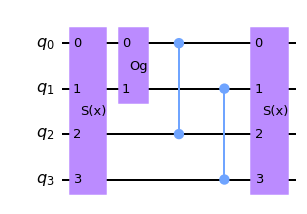

In [5]:
# Oracle shifted_f
def oracle_shifted_f(n):
    oracle_shifted_f = QuantumCircuit(n)
    oracle_shifted_f.append(shift_s(n, s), qargs=range(n))
    oracle_shifted_f.append(oracle_g(n), qargs=[0,1])
    for i in range(int(n/2)):
        oracle_shifted_f.cz(i,i+int(n/2))
    oracle_shifted_f.append(shift_s(n, s), qargs=range(n))
    oracle_shifted_f.name = 'shifted f'
    return oracle_shifted_f

oracle_shifted_f(n).draw('mpl')

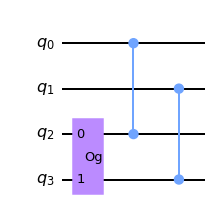

In [6]:
# Oracle fourier_f
def oracle_fourier_f(n):
    oracle_fourier_f = QuantumCircuit(n)
    oracle_fourier_f.append(oracle_g(n), qargs=[2,3])
    for i in range(int(n/2)):
        oracle_fourier_f.cz(i,i+int(n/2))
    oracle_fourier_f.name = 'fourier f'
    return oracle_fourier_f

oracle_fourier_f(n).draw('mpl')

Then we use implement the actual algorithm.

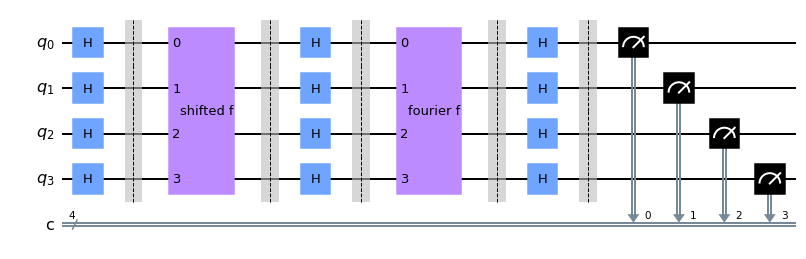

In [7]:
hsp_circuit = QuantumCircuit(n, n)

for i in range(n):
    hsp_circuit.h(i)
hsp_circuit.barrier()
hsp_circuit.append(oracle_shifted_f(n), range(n))
hsp_circuit.barrier()
for i in range(n):
    hsp_circuit.h(i)
hsp_circuit.barrier()
hsp_circuit.append(oracle_fourier_f(n), range(n))
hsp_circuit.barrier()
for i in range(n):
    hsp_circuit.h(i)
hsp_circuit.barrier()
for i in range(n):
    hsp_circuit.measure(i, i)

hsp_circuit.draw('mpl')

We can run the above circuit on the simulator. 

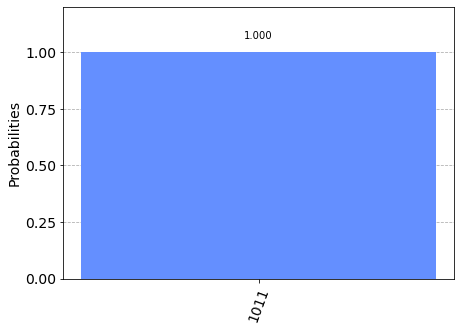

In [8]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
transpiled_hsp_circuit = transpile(hsp_circuit, aer_sim)
qobj = assemble(transpiled_hsp_circuit, aer_sim)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

We can see that the result of the measurement is the hidden string 1011.

### 2.2 Experiment with Real Devices <a id='supo-device'> </a>

We can run the circuit on the real device as below.

In [9]:
# Load our saved IBMQ accounts and get the least busy backend device with more than or equal to 6 qubits
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q-skku','yonsei-uni','yu-students')
provider.backends()
backend = least_busy(provider.backends(filters=lambda x: int(x.configuration().n_qubits) <= 16 and
                                   int(x.configuration().n_qubits) >= 4 and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibm_lagos


In [10]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

shots = 1024
transpiled_hsp_circuit = transpile(hsp_circuit, backend)
job = backend.run(transpiled_hsp_circuit, shots=shots)

job_monitor(job, interval=2)

Job Status: job has successfully run


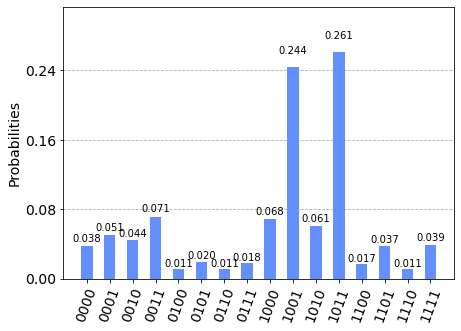

In [11]:
# Get the results from the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)

As we can (hopefully) see, there is a significatly higher chance of measuring $\lvert1011\rangle$. The other results are due to errors in the quantum computation. 

## 3. Example: General Oracle <a id='geno'> </a>

Now we go through the more general case where the oracle $O$ does not provide the Foruier-transformed function $f$.

### 3.1 Qiskit Implementation <a id='geno-simulation'> </a>

We'll now walk through the hidden-shift algorithm with general oracle. We employ the same function f as before.

In [12]:
def c_oracle_f(n):
    oracle = QuantumCircuit(n)
    oracle.compose(oracle_g(n), qubits=[0,1], inplace=True)
    for i in range(int(n/2)):
        oracle.cz(i,i+int(n/2))
    oracle = oracle.to_gate()
    oracle.name = 'oracle f'
    c_oracle = oracle.control()
    return c_oracle

def c_oracle_g(n, s):
    oracle = QuantumCircuit(n)
    oracle.compose(shift_s(n, s), inplace=True)
    oracle.compose(oracle_g(n), qubits=[0,1], inplace=True)
    for i in range(int(n/2)):
        oracle.cz(i,i+int(n/2))
    oracle.compose(shift_s(n, s), inplace=True)
    oracle = oracle.to_gate()
    oracle.name = 'oracle g'
    c_oracle = oracle.control()
    return c_oracle

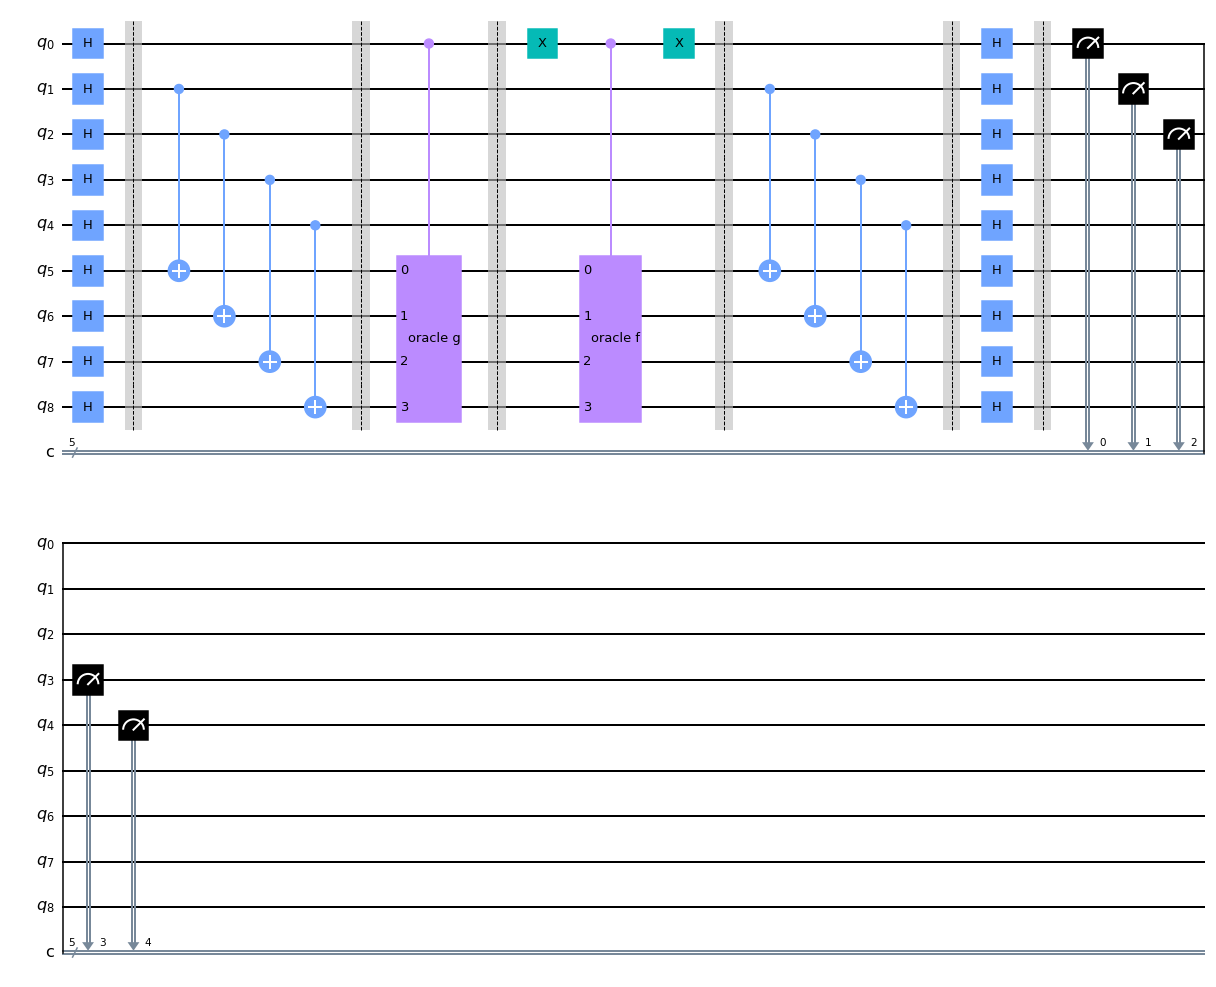

In [13]:
hsp_circuit = QuantumCircuit(2*n+1, n+1)

for i in range(2*n+1):
    hsp_circuit.h(i)
hsp_circuit.barrier()
for i in range(n):
    hsp_circuit.cx(i+1, i+n+1)
hsp_circuit.barrier()
hsp_circuit.append(c_oracle_g(n, s), 
             [0] + [n+i+1 for i in range(n)])
hsp_circuit.barrier()
hsp_circuit.x(0)
hsp_circuit.append(c_oracle_f(n), 
             [0] + [n+i+1 for i in range(n)])
hsp_circuit.x(0)
hsp_circuit.barrier()
for i in range(n):
    hsp_circuit.cx(i+1, i+n+1)
hsp_circuit.barrier()
for i in range(2*n+1):
    hsp_circuit.h(i)
hsp_circuit.barrier()
for i in range(n+1):
    hsp_circuit.measure(i, i)

hsp_circuit.draw('mpl')

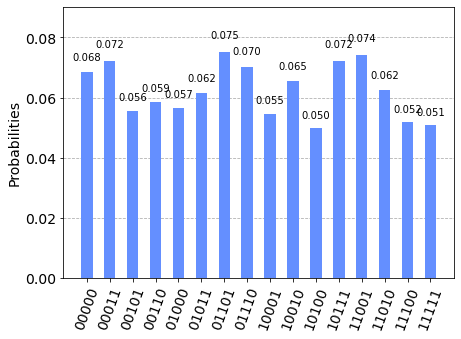

In [14]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
transpiled_hsp_circuit = transpile(hsp_circuit, aer_sim)
qobj = assemble(transpiled_hsp_circuit, aer_sim)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

Now we see that there are 16 different results. Checking an inner product $\left<s, 1 \mid a \right>$, the results runs out like below:

|(s, 1)|a|product|(s, 1)|a|product|
|:-:|:-:|:-:|:-:|:-:|:-:|
|10111|00000|0|10111|10001|1+1=0|
|10111|00011|1+1=0|10111|10010|1+1=0|
|10111|00101|1+1=0|10111|10100|1+1=0|
|10111|00110|1+1=0|10111|10111|1+1+1+1=0|
|10111|01000|0|10111|11001|1+1=0|
|10111|01011|1+1=0|10111|11010|1+1=0|
|10111|01101|1+1=0|10111|11100|1+1=0|
|10111|01110|1+1=0|10111|11111|1+1+1+1=0|

### 3.2 Experiment with Real Devices <a id='geno-device'> </a>

We can run the circuit on the real device as below.

In [15]:
# Load our saved IBMQ accounts and get the least busy backend device with more than or equal to 6 qubits
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q-skku','yonsei-uni','yu-students')
provider.backends()
backend = least_busy(provider.backends(filters=lambda x: int(x.configuration().n_qubits) <= 2*(2*n+1) and
                                   int(x.configuration().n_qubits) >= 2*n+1 and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_guadalupe


In [16]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

shots = 1024
transpiled_hsp_circuit = transpile(hsp_circuit, backend)
job = backend.run(transpiled_hsp_circuit, shots=shots)

job_monitor(job, interval=2)

Job Status: job has successfully run


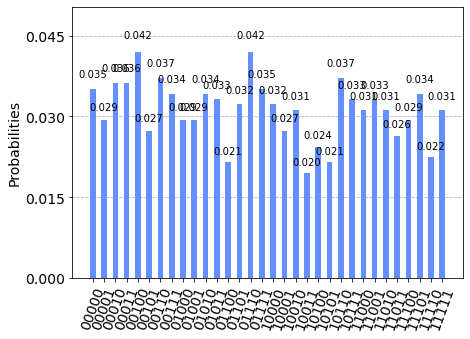

In [17]:
# Get the results from the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)

However we see terrible outputs, since the controlled-oracle gates is too expensive to perform by current devices.

## 4. Problems <a id='problems'> </a>

## 5. Breaking Poly1305 Encryption <a id="poly1305"> </a>

## 6. References <a id='references'> </a>

1. S. Bravyi & D. Gosset (2016), "Improved classical simulation of quantum circuits dominated by Clifford gates", Phys. Rev. Lett. 116, 250501, [doi:10.1103/PhysRevLett.116.250501](https://doi.org/10.1103/PhysRevLett.116.250501), [arXiv:1601.07601](https://arxiv.org/abs/1601.07601) [quant-ph]
2. M. Roetteler (2008), "Quantum algorithms for highly non-linear Boolean functions", Proceedings of the 21st Annual ACM-SIAM Symposium on Discrete Algorithms (SODA'10), pp. 448-457, [arXiv:0811.3208](https://arxiv.org/abs/0811.3208) [quant-ph]
3. X. Bonnetain & M. Naya-Plasencia (2018), "Hidden Shift Quantum Cryptanalysis and Implications", In: T. Peyrin , S. Galbraith (eds) Advances in Cryptology – ASIACRYPT 2018, Lecture Notes in Computer Science, vol 11272, Springer, Cham, [doi:10.1007/978-3-030-03326-2_19](https://doi.org/10.1007/978-3-030-03326-2_19)
4. K. Wright, K. M. Beck, S. Debnath et al. (2019), "Benchmarking an 11-qubit quantum computer", Nat Commun 10, 5464, [doi:10.1038/s41467-019-13534-2](https://doi.org/10.1038/s41467-019-13534-2)